<a href="https://colab.research.google.com/github/hridayanikaruna/SalaryAnalysis/blob/main/Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan Data sebelum melakukan Analisis

##Kasus(Relationship per tabel)
1. Industri mana yang memberikan gaji paling besar/kecil
2. Bagaimana pengaruh pengalaman kerja terhadap gaji: pengalaman kerja di bidang dengan gaji, dan pengalama kerja dengan gaji
3. Bagaimana pengaruh jenis kelamin terhadap gaji
4. Bagaimana pengaruh tingkat pendidikan terhadap gaji

##Data Preparation
Menyiapkan dataset

##Data Discovery & Profiling
1. Keterangan
- Semua data yang kita modusin jika mising value dibawah 1% dari total keseluruhan data
- Mengidentifikasi pola, hubungan, dan atribut lain dalam data, serta ketidakkonsistenan, anomali, nilai yang hilang, dan masalah lain sehingga dapat diatasi.

2. Kolom Industry 
- Problem: ada yang gak isi.
- Solusi: kita sesuaikan pakek kolom job title

3. Kolom Currency
- Kasus 1: 
  - Problem: ada orang yang ngisi di kolom currency dan juga di other currency, jadinya bisa aja dia currencynya USD tapi dia ngisi juga di other currency. 
  - Solusi: Jadinya kita cek yang di currency milih other dan ngisi di other currency. Yang ngisinya selain other di currency berarti di kolom other currency gak dipakek

4. Kolom Education
- Kasus 4: 
- Problem: data education ada yang memang gak ngisi education, atau memang dia gak punya education. 
- Solusi: kita ubah field nya makek nilai modus.

5. Kolom Gender
- Kasus 3: 
  - Problem: ada field kosong. 
  - Solusi: kolom gender untuk menangani field kosong kita makek cara modus

## Data Cleansing
Kesalahan dan masalah data yang teridentifikasi diperbaiki untuk membuat kumpulan data yang lengkap dan akurat. Misalnya, sebagai bagian dari kumpulan data pembersihan, data yang salah dihapus atau diperbaiki, nilai yang hilang diisi dan entri yang tidak konsisten diselaraskan.
1. Imputasi data per kolom dalam dataset Salary

##Data structuring
Data perlu dimodelkan dan diatur untuk memenuhi persyaratan analitik. Misalnya, data yang disimpan dalam file nilai yang dipisahkan koma (CSV) atau format file lainnya harus diubah menjadi tabel agar dapat diakses oleh BI dan alat analitik

## Format the data

## Combine the data


## Analysis the data


## Visualization

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Membaca Data

In [ ]:
df = pd.read_excel (r'salary_survey.xlsx')
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,country,us_country,city,work_experience_overall,work_experience_professional,education,gender,race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


#Mengecek dan Mengisi Data Kosong

In [ ]:
print(df.isnull().sum())

Timestamp                           0
age                                 0
industry                           72
job_title                           0
job_title_additional_context    20713
salary                              0
additional_salary                7256
currency                            0
other_currency                  27749
income_additional_context       24912
country                             0
us_country                       4982
city                               75
work_experience_overall             0
work_experience_professional        0
education                         214
gender                            167
race                              169
dtype: int64


##Mengisi Missing Value

###Modus
Data kosong yang bersifat kategorikal dan tidak dapat dihitung seperti data numerik, dapat diisi dengan modus. Modus akan memberikan nilai yang paling sering muncul dan sesuai dengan jenis data.

KET : KOLOM INDUSTRY SEMENTARA AJA

In [ ]:
mode_gender = df['gender'].mode()[0]
df['gender'].fillna(mode_gender, inplace=True)

mode_education = df['education'].mode()[0]
df['education'].fillna(mode_education, inplace=True)

mode_industry= df['industry'].mode()[0]
df['industry'].fillna(mode_industry, inplace=True)

Kode di atas merupakan pengisian missing value dengan modus untuk kolom gender, education, dan industry

In [ ]:
missing_gender = df['gender'].isnull().sum()
print('Jumlah missing value di kolom gender:', missing_gender)

missing_education = df['education'].isnull().sum()
print('Jumlah missing value di kolom education:', missing_education)

missing_industry = df['industry'].isnull().sum()
print('Jumlah missing value di kolom industry:', missing_industry)

Jumlah missing value di kolom gender: 0
Jumlah missing value di kolom education: 0


Setelah diisi missing valuenya dengan modus, kolom gender, education, dan industry sudah tidak memiliki value kosong lagi.

In [ ]:
try:
    df['industry'] = df.groupby('job_title')['industry'].apply(lambda x: x.fillna(x.mode()[0]))
except KeyError:
    mode_industry = df['industry'].mode()[0]
    df['industry'] = df['industry'].fillna(mode_industry)

#Mengubah Currency Rate

##Melihat data currency

In [ ]:
# Menampilkan kolom data
print(df.salary)
print(df.currency)
print(df.other_currency)

0         55000
1         54600
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: salary, Length: 27946, dtype: int64
0        USD
1        GBP
2        USD
3        USD
4        USD
        ... 
27941    USD
27942    USD
27943    USD
27944    USD
27945    USD
Name: currency, Length: 27946, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
27941    NaN
27942    NaN
27943    NaN
27944    NaN
27945    NaN
Name: other_currency, Length: 27946, dtype: object


In [ ]:
print(df.loc[434, 'currency'])

Other


Dapat dilihat bahwa data dengan **index 434** memiliki data currency **'Other'**. Maka dari itu, data currencynya perlu diambil dari kolom **other_currency**.

##Menggabungkan kolom curreny dengan other_curreny

In [ ]:
df['new_currency'] = df['currency']
df['new_currency'] = df['new_currency'].where(df['new_currency'] != 'Other', df['other_currency'])
print(df['new_currency'])

0        USD
1        GBP
2        USD
3        USD
4        USD
        ... 
27941    USD
27942    USD
27943    USD
27944    USD
27945    USD
Name: new_currency, Length: 27946, dtype: object


**Penjelasan Kode**

Nilai pada kolom **new_currency** yang bernilai **'Other'** akan **diganti** dengan nilai dari kolom **other_currency**. Jika nilai tidak bernilai other, maka data di new_currency akan tetap **sama**.

In [ ]:
print(df.loc[434, 'new_currency'])

INR


Setelah kolom currency dan other_currency digabung, dapat dilihat data dengan index 434 adalah INR

##Melihat jenis currency

In [ ]:
currency_types = df['new_currency'].unique()
currency_count = df['new_currency'].value_counts()
print(currency_types)
print(currency_count)

['USD' 'GBP' 'CAD' 'EUR' 'AUD/NZD' 'INR' 'Peso Argentino' 'CHF' 'MYR'
 'ZAR' 'SEK' 'HKD' 'NOK' 'BR$' 'Dkk' 'TTD' 'Indian rupees' 'BRL (R$)'
 'Mexican pesos' 'CZK' 'DKK' 'Bdt' 'American Dollars' 'Php'
 'PLN (Polish zloty)' 'czech crowns' 'TRY' 'Norwegian kroner (NOK)' 'CNY'
 'ILS/NIS' nan 'US Dollar' 'BRL' 'NIS (new Israeli shekel)'
 'RMB (chinese yuan)' 'AUD' 'JPY' 'Taiwanese dollars' 'Philippine Peso'
 'SGD' 'KRW (Korean Won)' 'Czk' 'THB' 'IDR ' 'Sgd' 'Nok' 'NZD'
 'ILS (Shekel)' 'DKK ' 'China RMB' 'AUD Australian ' 'LKR' 'Polish Złoty'
 'Philippine peso (PHP)' 'Australian Dollars ' 'PHP' 'Equity' 'ARS'
 'Argentinian peso (ARS)' 'Israeli Shekels' 'ILS' 'MXN'
 'PhP (Philippine Peso)' 'PLN' 'KRW' 'SAR' 'RM' 'IDR' 'Argentine Peso'
 'Philippine Pesos' 'Ils' 'INR (Indian Rupee)' 'NTD' 'Danish Kroner'
 'Korean Won ' 'dkk' 'Euro' 'SGD ' 'Mexican Pesos' 'THAI  BAHT'
 'Thai Baht ' 'croatian kuna' 'PLN (Zwoty)' 'Rupees' 'Singapore Dollara'
 'NGN' 'COP']
USD                23296
CAD              

Dapat dilihat bahwa data currency pada kolom new_currency masih kotor dan masih banyak duplikasi. Maka dari itu, data tersebut perlu dibersihkan dan diseragamkan.

In [ ]:
is_nan = df['new_currency'].isna().sum()
print(is_nan)

equity_count = df['new_currency'].value_counts()['Equity']
print("Jumlah nilai 'equity':", equity_count)

4
Jumlah nilai 'equity': 1


Terdapat pula data bernilai nan dan equity (saham). Data tersebut harus dihapus. 

##Cleaning Currency

Mengubah dan menyeragamkan currency

In [ ]:
df['new_currency'] = df['new_currency'].str.upper().replace(['AUD/NZD', 'NZD', 'AUD Australian ', 'Australian Dollars ', 'AUSTRALIAN DOLLARS ', 'AUD AUSTRALIAN', 'AUD AUSTRALIAN '], 'AUD')
df['new_currency'] = df['new_currency'].str.upper().replace(['Peso Argentino', 'Argentinian peso (ARS)', 'Argentine Peso', 'ARGENTINIAN PESO (ARS)', 'ARGENTINE PESO', 'PESO ARGENTINO'], 'ARS')
df['new_currency'] = df['new_currency'].str.upper().replace(['BR$', 'BRL (R$)'], 'BRL')
df['new_currency'] = df['new_currency'].str.upper().replace(['Dkk', 'DKK ', 'Danish Kroner', 'dkk', 'DANISH KRONER'], 'DKK')
df['new_currency'] = df['new_currency'].str.upper().replace(['Indian rupees', 'INR (Indian Rupee)', 'Rupees', 'INDIAN RUPEES', 'INR (INDIAN RUPEE)', 'RUPEES'], 'INR')
df['new_currency'] = df['new_currency'].str.upper().replace(['Mexican pesos', 'Mexican Pesos', 'MEXICAN PESOS'], 'MXN')
df['new_currency'] = df['new_currency'].str.replace('Bdt', 'BDT')
df['new_currency'] = df['new_currency'].str.upper().replace(['American Dollars', 'US Dollar', 'AMERICAN DOLLARS', 'US DOLLAR'], 'USD')
df['new_currency'] = df['new_currency'].str.upper().replace(['Php', 'Philippine Peso', 'Philippine peso (PHP)', 'PhP (Philippine Peso)', 'Philippine Pesos', 'PHILIPPINE PESO', 'PHP (PHILIPPINE PESO)', 'PHILIPPINE PESOS', 'PHILIPPINE PESO (PHP)'], 'PHP')
df['new_currency'] = df['new_currency'].str.upper().replace(['PLN (Polish zloty)', 'Polish Złoty', 'PLN (Zwoty)', 'PLN (POLISH ZLOTY)', 'PLN (ZWOTY)', 'POLISH ZŁOTY'], 'PLN')
df['new_currency'] = df['new_currency'].str.upper().replace(['czech crowns', 'Czk', 'CZECH CROWNS'], 'CZK')
df['new_currency'] = df['new_currency'].str.upper().replace(['Norwegian kroner (NOK)', 'Nok', 'NORWEGIAN KRONER (NOK)'], 'NOK')
df['new_currency'] = df['new_currency'].str.upper().replace(['ILS/NIS', 'NIS (new Israeli shekel)', 'ILS (Shekel)', 'Israeli Shekels', 'Ils', 'NIS (NEW ISRAELI SHEKEL)', 'ISRAELI SHEKELS', 'ILS (SHEKEL)'], 'NIS')
df['new_currency'] = df['new_currency'].str.upper().replace(['RMB (chinese yuan)', 'RMB (CHINESE YUAN)'], 'RMB')
df['new_currency'] = df['new_currency'].str.upper().replace(['Taiwanese dollars', 'TAIWANESE DOLLARS'], 'TWD')
df['new_currency'] = df['new_currency'].str.upper().replace(['KRW (Korean Won)', 'Korean Won ', 'KOREAN WON ', 'KRW (KOREAN WON)'], 'KRW')
df['new_currency'] = df['new_currency'].str.replace('IDR ', 'IDR')
df['new_currency'] = df['new_currency'].str.upper().replace(['Sgd', 'SGD ', 'Singapore Dollara', 'SINGAPORE DOLLARA'], 'SGD')
df['new_currency'] = df['new_currency'].str.upper().replace(['China RMB', 'CHINA RMB'], 'CNY')
df['new_currency'] = df['new_currency'].str.upper().replace(['Euro', 'EURO'], 'EUR')
df['new_currency'] = df['new_currency'].str.upper().replace(['THAI  BAHT', 'Thai Baht ', 'THAI BAHT '], 'THB')
df['new_currency'] = df['new_currency'].str.upper().replace(['croatian kuna', 'CROATIAN KUNA'], 'THB')

Menghapus nilai NaN dan equity

In [ ]:
# Menemukan letak nilai NaN dan Equity pada kolom 'new_currency'
nan_index = df[df['new_currency'].isna()].index
equity_index = df.loc[df['new_currency'] == 'Equity'].index

# Cetak indeks
print("Letak nilai Nan pada indeks : ", nan_index)
print("Letak nilai equity pada indeks : ", equity_index)

Letak nilai Nan pada indeks :  Int64Index([9344, 18843, 18882, 18904], dtype='int64')
Letak nilai equity pada indeks :  Int64Index([14915], dtype='int64')


In [ ]:
df = df.drop([9344, 18843, 18882, 18904, 14915])

Mengecek currency yang sudah dicleaning

In [ ]:
currency_types = df['new_currency'].unique()
currency_count = df['new_currency'].value_counts()
print(currency_types)
print(currency_count)

['USD' 'GBP' 'CAD' 'EUR' 'AUD' 'INR' 'ARS' 'CHF' 'MYR' 'ZAR' 'SEK' 'HKD'
 'NOK' 'BRL' 'DKK' 'TTD' 'MXN' 'CZK' 'BDT' 'PHP' 'PLN' 'TRY' 'CNY' 'NIS'
 'RMB' 'JPY' 'TWD' 'SGD' 'KRW' 'THB' 'IDR' 'LKR' 'ILS' 'SAR' 'RM' 'NTD'
 'NGN' 'COP']
USD    23298
CAD     1666
GBP     1587
EUR      639
AUD      507
CHF       38
SEK       38
JPY       23
ZAR       15
INR       13
SGD       12
DKK       12
NOK       10
BRL        8
PLN        8
MYR        8
CZK        6
PHP        6
ARS        5
THB        5
KRW        4
NIS        4
HKD        4
MXN        4
ILS        3
CNY        3
TRY        2
NTD        2
IDR        2
NGN        1
RM         1
SAR        1
BDT        1
LKR        1
TWD        1
RMB        1
TTD        1
COP        1
Name: new_currency, dtype: int64


Setelah dibersihkan, data currency jadi lebih rapi dan seragam.

##Mengubah data salary menjadi USD

In [ ]:
def convert_to_usd(salary, new_currency):
    exchange_rates = {'USD': 1, 'GBP': 0.81, 'CAD': 1.37, 'EUR': 0.85, 'AUD': 1.48,
                  'INR': 82.50, 'ARS': 205.3, 'CHF': 0.9, 'MYR': 4.43, 'ZAR': 18.18, 
                  'SEK': 10.28, 'HKD': 7.84, 'NOK': 10.43, 'BRL': 5.24, 'DKK': 6.84,  
                  'TTD': 6.80, 'MXN': 18.57, 'CZK': 21.78, 'BDT': 107.00, 'PHP': 54.50, 
                  'PLN': 4.30, 'TRY': 19.05, 'CNY': 6.88, 'NIS': 3.62, 'RMB': 6.88, 
                  'JPY': 130.89, 'TWD': 30.37, 'SGD': 1.33, 'KRW': 1294.25, 'THB': 34.20, 
                  'IDR': 15185.05, 'LKR': 322.52, 'ILS': 3.62, 'SAR': 3.76, 'RM': 4.44,
                  'NTD':30.38, 'NGN':460.45, 'COP': 4773.00}
    if new_currency in exchange_rates:
        return salary / exchange_rates[new_currency]
    else:
        return None

df['usd_salary'] = df.apply(lambda row: convert_to_usd(row['salary'], row['new_currency']), axis=1)

**Penjelasan Kode**

exchange_rates merupakan dictionary yang berisi nilai tukar untuk setiap currency yang ingin diubah. Dictionary ini harus memiliki format currency tujuan sebagai kunci dan nilai tukar sebagai nilai. Saya menetapkan USD sebagai currency tujuan. Di sini saya tidak menggunakan library untuk convert currency karena error, banyak mata uang yang tidak terdeteksi.

Fungsi convert_to_usd ini bertujuan untuk mengonversi nilai gaji dalam currency yang berbeda menjadi nilai gaji dalam currency tujuan. Fungsi ini akan menerima dua argumen: nilai gaji dan currency. Fungsi akan mengembalikan nilai gaji dalam currency tujuan. Fungsi juga berisi exchange_rates yang sudah dibuat sebelumnya. Fungsi convert_to_usd() akan mengonversi nilai gaji ke USD. Fungsi akan memeriksa apakah currency yang diberikan ada dalam dictionary nilai tukar. Jika ya, maka fungsi akan mengembalikan nilai gaji yang sudah dikonversi. Jika tidak, maka fungsi akan mengembalikan None.

Jika sudah, kolom baru 'usd_salary' akan ditambahkan pada dataframe. Kolom baru ini akan diisi dengan nilai gaji dalam USD yang dihitung dengan menggunakan fungsi convert_to_usd() pada setiap baris dataframe.

Mengecek data salary sebelum dikonversi menjadi USD

In [ ]:
salary = df['salary']
print(salary)

0         55000
1         54600
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: salary, Length: 27945, dtype: int64


Mengecek data salary setelah dikonversi menjadi USD

In [ ]:
df['usd_salary'] = df['usd_salary'].astype(int)
usd_salary = df['usd_salary']
print(usd_salary)

0         55000
1         67407
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: usd_salary, Length: 27941, dtype: int64


#Eksplorasi EDA

##Hubungan gaji dengan pengalaman kerja

Text(0.5, 0, 'Tahun Pengalaman Kerja')

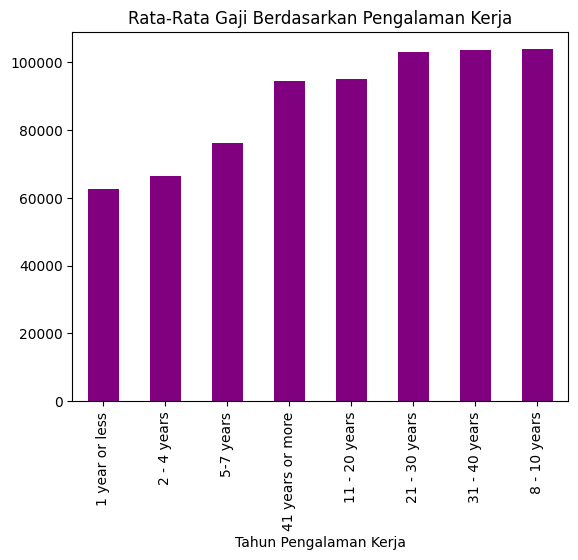

In [ ]:
mean_salary_by_year = df.groupby('work_experience_overall')['usd_salary'].mean()
mean_salary_by_year = mean_salary_by_year.sort_values()
mean_salary_by_year.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Pengalaman Kerja')
plt.xlabel('Tahun Pengalaman Kerja')